ref: 
https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words
http://brandonrose.org/clustering

http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

In [7]:
##### Function to apply text analysis to a column with `colname` in the data file `filename`


#----------------------------------------------------------------------------------------------------
### Input ###
        # colname: colname name of the variable
        # filename: filename of the data
        # var_explain: the threshold of the variance explained to select the top PCs in PCA analysis, 
                        # value between (0,1)
        # savename: name of the data file generated
        
### Input ###
        # a data file with each column named as `colname_pci`, saved in local directory as `savename`
#----------------------------------------------------------------------------------------------------        



def text_analysis(colname = "plot outline", filename = "feature_multi_top100.txt", var_explain = 0.6,
                  savename = "plot_outline_text_analysis.csv"):
    
    import pandas as pd
    import numpy as np
    import re
    import warnings
    warnings.filterwarnings("ignore")
    
    
    
    ### --------------- Load Data --------------- ###
    df = pd.read_csv(filename)
    df_col = df[colname]
    
    
    ## --------------- Bag-of-Words --------------- ##
    
    ## string to list
    import re
    col_words = []
    
    for i in range(len(df_col)):
    
        if type(df_col[i]) == str: 
            letters_only = re.sub("[^a-zA-Z]", " " , df_col[i]) # remove non-letter
            lower_case = letters_only.lower().split()   # Convert to lower case # Split into words
            
            # avoid downloading nltk
            # from NLTK stopwords https://pythonprogramming.net/stop-words-nltk-tutorial/
            stops = {'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 
                     'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 
                     'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 
                     's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 
                     'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 
                     'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 
                     'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 
                     'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 
                     'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 
                     'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 
                     'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 
                     'it', 'how', 'further', 'was', 'here', 'than'} 
            meaningful_words = [w for w in lower_case if not w in stops]  # Remove stop words from "words"
            
            words = ( " ".join(meaningful_words))
    
        else: words = "NA"
       
        col_words.append(words)
        
        
    
    ## list to vector
    from sklearn.feature_extraction.text import TfidfVectorizer

    # Initialize the "TfidfVectorizer" object
    vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

    col_data = vectorizer.fit_transform(col_words)
    col_data = col_data.toarray()

    
    ## --------------- PCA --------------- ##
    
    from sklearn.decomposition import PCA
    pca = PCA(n_components = var_explain, svd_solver = "full") # keep the first n PCs with ?% variance explained
    df_pca = pd.DataFrame(pca.fit_transform(col_data))
    
    ## ------------- Align with imdb_id and save ------------##
    
    df_new_pca = pd.concat([df["imdb_ids"], df_pca], axis = 1)

    col_names = ["imdb_ids"]
    for i in range(df_pca.shape[1]):
        i_name = colname + "_PC" + str(i+1)
        col_names.append(i_name)
    
    df_new_pca.columns = col_names
    df_new_pca.to_csv(savename, index = False)
    


In [19]:
text_analysis(colname = "plot outline", filename = "feature_final.csv", var_explain = 0.6,
                  savename = "plot_outline_text_analysis.csv")

In [17]:
pd.read_csv("title_text_analysis.csv", index_col = False).head()

,imdb_ids,title_PC1,title_PC2,title_PC3,title_PC4,title_PC5,title_PC6,title_PC7,title_PC8,title_PC9,...,title_PC765,title_PC766,title_PC767,title_PC768,title_PC769,title_PC770,title_PC771,title_PC772,title_PC773,title_PC774
0,113101,-0.016966,-0.035989,-0.017697,0.006934,-0.008735,-0.012857,-0.008954,-0.012074,-0.007223,...,0.008489,-0.009503,-0.002953,0.009314,0.003922,0.000010,0.001277,0.006853,0.001184,0.001695
1,425473,-0.016873,-0.036524,-0.018524,0.007006,-0.008815,0.002324,-0.009406,-0.012041,-0.007390,...,-0.021043,-0.030399,-0.034877,-0.003425,0.030808,-0.037812,-0.034678,-0.052084,0.012161,-0.055545
2,76759,-0.018372,-0.039272,-0.020346,0.007949,-0.010655,-0.016468,-0.011533,-0.015880,-0.010302,...,0.010894,0.012331,0.001787,-0.007056,0.011386,-0.004958,-0.016144,-0.011850,-0.010595,-0.000447
3,266543,-0.016508,-0.034921,-0.016871,0.006602,-0.008198,-0.012275,-0.008378,-0.011226,-0.006614,...,0.002916,-0.002969,-0.020402,-0.002817,0.011288,0.004961,-0.002594,-0.010984,0.018433,0.004039
4,411267,-0.018310,-0.039123,-0.020304,0.007932,-0.010589,-0.016833,-0.011297,-0.015811,-0.010358,...,0.005634,-0.000116,-0.003709,-0.000806,0.004753,-0.001202,0.003232,-0.002492,0.004136,-0.002692


In [20]:
pd.read_csv("plot_outline_text_analysis.csv", index_col = False).head()

,imdb_ids,plot outline_PC1,plot outline_PC2,plot outline_PC3,plot outline_PC4,plot outline_PC5,plot outline_PC6,plot outline_PC7,plot outline_PC8,plot outline_PC9,...,plot outline_PC654,plot outline_PC655,plot outline_PC656,plot outline_PC657,plot outline_PC658,plot outline_PC659,plot outline_PC660,plot outline_PC661,plot outline_PC662,plot outline_PC663
0,113101,0.209100,-0.249578,0.047400,-0.189600,-0.033279,0.584439,0.639913,0.003473,0.492875,...,-0.079099,-0.069085,0.032248,-0.059841,0.002461,0.097810,0.045898,-0.018330,0.009920,0.006478
1,425473,0.153059,-0.020990,0.015593,0.044339,-0.026147,-0.269001,-0.040621,0.342156,0.378050,...,0.008880,-0.027237,0.048239,-0.019864,0.025719,-0.010047,-0.045511,0.012958,0.004631,-0.038099
2,76759,0.251558,-0.273051,-0.429282,0.388496,-0.151535,-0.519481,0.157246,-0.325777,-0.095891,...,0.121514,0.045545,0.056450,0.130087,-0.045059,0.070075,0.036093,-0.074553,0.025525,-0.083808
3,266543,0.123136,-0.115940,-0.011230,-0.167630,-0.033700,0.041143,-0.028941,-0.046633,-0.082711,...,-0.024436,-0.019153,-0.034189,-0.007303,-0.040298,-0.019495,-0.009164,0.010500,-0.013782,-0.023802
4,411267,0.365535,0.746240,-0.194165,-0.104639,-0.410268,0.188274,0.093011,0.146438,-0.243281,...,-0.044182,0.080086,-0.003491,-0.021149,-0.017171,0.083459,0.030888,0.047528,0.115970,0.047451


In [10]:
pd.read_csv("mpaa_reason_text_analysis.csv", index_col = False).head()

,imdb_ids,mpaa_reason_PC1,mpaa_reason_PC2,mpaa_reason_PC3,mpaa_reason_PC4,mpaa_reason_PC5,mpaa_reason_PC6
0,113101,1.524211,0.039434,0.950530,-1.191170,-0.305996,-0.390907
1,425473,-0.267575,0.005658,0.020702,-0.003143,0.002229,-0.003595
2,76759,1.403732,-0.580523,-0.618520,0.167422,-0.242381,-0.169628
3,266543,-0.267575,0.005658,0.020702,-0.003143,0.002229,-0.003595
4,411267,0.971957,0.014142,-0.661134,-0.315824,0.124360,0.139904


In [12]:
pd.read_csv("tagline_TMDB_text_analysis.csv", index_col = False).head()

,imdb_ids,tagline_TMDB_PC1,tagline_TMDB_PC2,tagline_TMDB_PC3,tagline_TMDB_PC4,tagline_TMDB_PC5,tagline_TMDB_PC6,tagline_TMDB_PC7,tagline_TMDB_PC8,tagline_TMDB_PC9,...,tagline_TMDB_PC310,tagline_TMDB_PC311,tagline_TMDB_PC312,tagline_TMDB_PC313,tagline_TMDB_PC314,tagline_TMDB_PC315,tagline_TMDB_PC316,tagline_TMDB_PC317,tagline_TMDB_PC318,tagline_TMDB_PC319
0,113101,0.802156,0.967163,0.010791,0.905897,0.379563,0.040879,-0.088245,0.076809,-0.499168,...,0.017968,8.948101e-02,-0.039735,-0.032340,0.081521,0.027271,-0.050627,-2.728212e-02,-0.082120,0.014426
1,425473,-0.360715,0.003423,0.002612,-0.000076,0.000819,-0.000073,0.000691,0.000786,0.000031,...,-0.000005,3.204457e-07,0.000006,-0.000003,0.000002,-0.000001,0.000004,-5.825354e-07,-0.000003,-0.000006
2,76759,0.672340,-0.042455,-0.052670,0.018598,-0.115342,0.036442,-0.069255,0.124322,0.901564,...,0.065282,-1.788911e-02,0.000713,0.001416,0.016457,-0.048913,0.050363,6.186969e-02,0.030200,0.057874
3,266543,0.718510,0.864992,-0.082092,0.100358,-0.334478,-0.064106,-0.015041,-0.097238,-0.181998,...,-0.022166,-7.018963e-02,-0.062207,-0.159878,0.134652,0.027290,0.017872,-1.442054e-01,-0.086918,-0.032794
4,411267,0.775551,1.846033,-0.066730,0.181479,-0.468725,0.072262,-0.001543,-0.088735,-0.095463,...,0.004478,2.395810e-04,-0.010762,0.033077,-0.002389,-0.026293,-0.014057,1.063111e-02,-0.030362,0.026218


---

## 1. Text Analysis on Sampled Data (5k)

### Use Tf-idf and document similarity
[example code]

training data: the first 3000 rows

test data: the rest 1865 rows

In [1]:
## if running on AWS

#!pip install scipy

  Using cached scipy-0.19.0-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached numpy-1.12.1-cp27-cp27mu-manylinux1_x86_64.whl
You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#### Sampled Data: X

In [43]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")
    
    
    
### --------------- Load X (feature) --------------- ###
df = pd.read_csv("data_feature_4865.csv")
df_train= df.iloc[:3000, ]
df_test = df.iloc[3000:, ]

In [44]:
df_train.columns.values

array(['Unnamed: 0', 'imdb_ids', 'title', 'director', 'distributors',
       'year', 'rating', 'votes', 'languages', 'producer', 'mpaa',
       'writer', 'top 250 rank', 'countries', 'aspect_ratio',
       'production companies', 'cinematographer', 'plot outline', 'plot',
       'cast', 'animation department', 'original music',
       'editorial department', 'mpaa_reason', 'revenue_TMDB',
       'overview_TMDB', 'tagline_TMDB', 'vote_count_TMDB',
       'belongs_to_collection_TMDB', 'original_language_TMDB',
       'status_TMDB', 'release_date_TMDB', 'popularity_TMDB',
       'budget_TMDB', 'vote_average_TMDB', 'runtime_TMDB'], dtype=object)

#### Sampled Data: y

In [45]:
### load y (genre)
df_genre = pd.read_csv("data_genre_4865.csv", index_col = None)
df_genre = df_genre.iloc[:, 1:]
df_genre.shape

(4865, 8)

In [46]:
df_genre_train = df_genre.iloc[:3000, ]
df_genre_test = df_genre.iloc[3000:, ]

#### Colname for text analysis

In [47]:
def bag_of_words(df_col):
    
    ## string to list
    import re
    col_words = []
    
    for i in range(len(df_col)):
    
        if type(df_col[i]) == str: 
            letters_only = re.sub("[^a-zA-Z]", " " , df_col[i]) # remove non-letter
            lower_case = letters_only.lower().split()   # Convert to lower case # Split into words

            # avoid downloading nltk
            # from NLTK stopwords https://pythonprogramming.net/stop-words-nltk-tutorial/
            stops = {'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 
                         'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 
                         'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 
                         's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 
                         'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 
                         'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 
                         'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 
                         'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 
                         'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 
                         'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 
                         'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 
                         'it', 'how', 'further', 'was', 'here', 'than'} 
            meaningful_words = [w for w in lower_case if not w in stops]  # Remove stop words from "words"

            words = ( " ".join(meaningful_words))

        else: words = "NA"

        col_words.append(words)
    
    return col_words

In [48]:
### extract text from a single column

#colname = "overview_TMDB"
#col_train = df_train[colname].reset_index(drop = True)
#col_test = df_test[colname].reset_index(drop = True)


### combine the text in ['title', 'plot', 'plot outline', 'overview_TMDB', 'tagline_TMDB']

col_train = df_train['title'].str.cat([df_train['plot'], df_train['plot outline'], 
                              df_train['overview_TMDB'], df_train['tagline_TMDB']], 
                              na_rep = " ")


col_test = df_test['title'].str.cat([df_test['plot'], df_test['plot outline'], 
                              df_test['overview_TMDB'], df_test['tagline_TMDB']], 
                              na_rep = " ")
col_test.index = col_test.index - 3000

In [49]:

## --------------- Bag-of-Words --------------- ##
    
## string to list

col_train = bag_of_words(col_train)
col_test = bag_of_words(col_test)
    
## list to vector
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the "CountVectorizer" object
          # max_df: ignore terms that have a document frequency strictly higher than the given threshold
          # min_df: ignore terms that have a document frequency strictly lower than the given threshold
          # ngram_range: The lower and upper boundary of the range of n-values for different n-grams to be extracted
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=30, stop_words='english',
                                 use_idf=True, 
                                 #tokenizer=tokenize_and_stem, 
                                 ngram_range=(1,3))

vectorizer.fit(col_train)

words_train = vectorizer.transform(col_train, copy = True)
words_train = words_train.toarray()

words_test = vectorizer.transform(col_test, copy = True)
words_test = words_test.toarray()


In [50]:
## data frame with one-hot coding for each word
text_train = pd.DataFrame(words_train, columns = vectorizer.vocabulary_ )
text_test = pd.DataFrame(words_test, columns = vectorizer.vocabulary_ )

In [51]:
print (text_train.shape)
print (text_test.shape)

(3000, 1095)
(1865, 1095)


### Bag-of-Words Dimensions
For the 3000 training data:

- [mpaa_reason]: min_df=3, 291 words, 61 PCs (80% variance)
- [plot_outline]: min_df=5, 1477 words, 583 PCs (80% variance)
- [tagline_TMDB]: min_df = 5, 179 words, 71 PCs (80% variance)
- [plot]: min_df = 10, 2833 words, 794 PCs (80% variance)
- [overview_TMDB]: min_df = 10, 1576 words, 641 PCs (80% variance)
- all combined: min_df = 30, 1095 words, 503 PCs (80% variance)
- all combined: min_df = 30, 1095 words, 283 PCs (60% variance)

all text combined (1095 words):
- 60% variance: 283 PCs
- 50% variance: 206 PCs
- 40% variance: 143 PCs
- 30% variance: 91 PCs
- 20% variance: 50 PCs
- 10% variance: 19 PCs


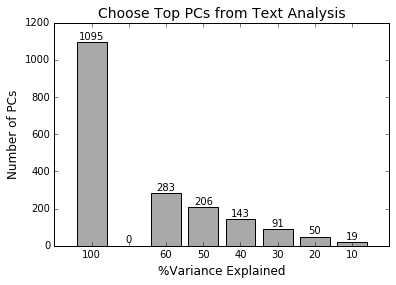

In [120]:
### Plot: number of PCs to choose for text analysis

var = range(8)
n_pc = [1095, 0, 283, 206, 143, 91, 50, 19]


import matplotlib.pyplot as plt

plt.bar(var, n_pc, align = "center", color = "darkgray")
plt.xticks(var, ["100", "", "60", "50", "40", "30", "20", "10"])
for i in range(8):
    plt.text(var[i], 5+n_pc[i], str(n_pc[i]), ha = "center", va = "bottom")

plt.xlabel("%Variance Explained", fontsize = 12)
plt.ylabel("Number of PCs", fontsize = 12)
plt.title("Choose Top PCs from Text Analysis", fontsize = 14)
#plt.show()
plt.savefig("pca_all_text_number.png")

#### Dimensino Reduction on Train Data

In [125]:
### MDS

from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state = 0)
text_train_mds = mds.fit_transform(text_train)

plot_train = pd.DataFrame({"Dim1" : text_train_mds[:,0],
                           "Dim2" : text_train_mds[:,1],
                           "Drama" : df_genre_train.iloc[:,6] 
    })

In [57]:
### PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=0.6)
text_train_pca = pca.fit_transform(text_train)

plot_train = pd.DataFrame({"Dim1" : text_train_pca[:,0],
                           "Dim2" : text_train_pca[:,1],
                           "Drama" : df_genre_train.iloc[:,6] 
    })


# transform test data
text_test_pca = pca.transform(text_test)

print (text_train_pca.shape)
print (text_test_pca.shape)

(3000, 283)
(1865, 283)


In [76]:
# number of PC for 60% variance
n_pc = text_train_pca.shape[1]

df_train_text = pd.DataFrame(text_train_pca, index = df_train.imdb_ids)
df_test_text = pd.DataFrame(text_test_pca, index = df_test.imdb_ids)

## rename the columns as text_PC1, text_PC2, etc. 
col_names = []
for i in range(n_pc):
    i_name = "text_PC" + str(i+1)
    col_names.append(i_name)

df_train_text.columns = col_names
df_test_text.columns = col_names

In [78]:
## save data for feature 'text'
df_train_text.to_csv("data_text_4865_train.csv")
df_test_text.to_csv("data_text_4865_test.csv")

In [60]:
### TSNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state = 0)
text_train_tsne = tsne.fit_transform(text_train)

plot_train = pd.DataFrame({"Dim1" : text_train_tsne[:,0],
                           "Dim2" : text_train_tsne[:,1],
                           "Drama" : df_genre_train.iloc[:,6] 
    })

#### Split `Drama` and `non-Drama` genre

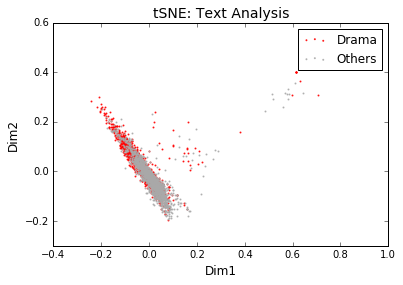

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_train_drama = plot_train[plot_train["Drama"] == 1]
plot_train_nondrama = plot_train[plot_train["Drama"] == 0]


plt.scatter(plot_train_drama["Dim1"], plot_train_drama["Dim2"], 
            color = "Red", alpha = 0.8, s = 1, label = "Drama")
plt.scatter(plot_train_nondrama["Dim1"], plot_train_nondrama["Dim2"], 
            color = "darkgray", alpha = 0.8, s = 1, label = "Others")
plt.xlabel("Dim1", fontsize = 12)
plt.ylabel("Dim2", fontsize = 12)
plt.title("PCA: Text Analysis", fontsize = 14)
plt.legend()
plt.show()
#plt.savefig("pca_all_text.png")

## 2. Text Analysis on Full Data (25k)

In [2]:
## if running on AWS

#!pip install scipy

  Using cached scipy-0.19.0-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached numpy-1.12.1-cp27-cp27mu-manylinux1_x86_64.whl
You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_x = pd.read_csv("feature_final.csv", index_col = None)
df_y = pd.read_csv("genre_final.csv", index_col = None)
df_y = df_y[["Drama"]]

In [121]:
col_x = df_x['title'].str.cat([df_x['plot'], df_x['plot outline'], 
                              df_x['overview_TMDB'], df_x['tagline_TMDB']], 
                              na_rep = " ")

In [27]:
#colname = "overview_TMDB"

In [125]:
## text into word vector

#col_x = df_x[colname].reset_index(drop = True)

## --------------- Bag-of-Words --------------- ##
    
## string to list

col_x = bag_of_words(col_x)
    
## list to vector
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the "CountVectorizer" object
          # max_df: ignore terms that have a document frequency strictly higher than the given threshold
          # min_df: ignore terms that have a document frequency strictly lower than the given threshold
          # ngram_range: The lower and upper boundary of the range of n-values for different n-grams to be extracted
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=40, stop_words='english',
                                 use_idf=True, 
                                 #tokenizer=tokenize_and_stem, 
                                 ngram_range=(1,3))

vectorizer.fit(col_x)

words_x = vectorizer.transform(col_x, copy = True)
words_x = words_x.toarray()


In [126]:
## data frame with one-hot coding for each word
text_x = pd.DataFrame(words_x, columns = vectorizer.vocabulary_ )

In [127]:
print (text_x.shape)

(24333, 6318)


#### Bag-of-Words Dimensions
For the 25k training data:

- [mpaa_reason]: min_df=5, 946 words, 164 PCs (80% variance)
- [plot_outline]: min_df=20, 2438 words, 1183 PCs (80% variance)
- [tagline_TMDB]: min_df=10,  709 words, 251 PCs (80% variance)
- [plot]: min_df=30, 6375 words, 2355 PCs (80% variance)
- [overview_TMDB]: min_df=30, 3962 words, 1854 PCs (80% variance)

- all text: min_df = 30, 8072 words, 3107 PCs (80% variance)
- all text: min_df = 40, 6318 words,  PCs (80% variance)

In [39]:
### PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
text_x_pca = pca.fit_transform(text_x)

plot_x = pd.DataFrame({"Dim1" : text_x_pca[:,0],
                        "Dim2" : text_x_pca[:,1],
                        "Drama" : df_y["Drama"]})

print (text_x_pca.shape)

(24333, 3107)


In [14]:
### TSNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state = 0)
text_x_tsne = tsne.fit_transform(text_x)

plot_x = pd.DataFrame({"Dim1" : text_x_tsne[:,0],
                           "Dim2" : text_x_tsne[:,1],
                           "Drama" : df_y["Drama"]
    })

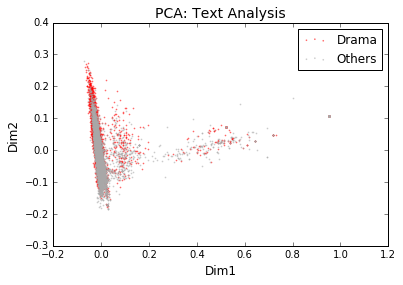

In [42]:
## plot

import matplotlib.pyplot as plt
%matplotlib inline

plot_x_drama = plot_x[plot_x["Drama"] == 1]
plot_x_nondrama = plot_x[plot_x["Drama"] == 0]


plt.scatter(plot_x_drama["Dim1"], plot_x_drama["Dim2"], 
            color = "Red", alpha = 0.5, s = 0.5, label = "Drama")
plt.scatter(plot_x_nondrama["Dim1"], plot_x_nondrama["Dim2"], 
            color = "darkgray", alpha = 0.5, s = 0.5, label = "Others")
plt.xlabel("Dim1", fontsize = 12)
plt.ylabel("Dim2", fontsize = 12)
plt.title("tSNE: Text Analysis", fontsize = 14)
plt.legend()
#plt.show()
plt.savefig("tsne_all_text_25k.png")